## Introduction to Guassian process

Consider the following function
$$y=f(x)=\theta_0 + \theta_1 x , \theta_0, \theta_1 \sim \mathcal{N}(0,1), x \in \mathbb{R}$$
Suppose that on has the data set $\textbf{x}= \lbrace x_i \rbrace_1^n$, and we assume that there is no noise in the current model.

Assuming independence of the model, we have for each $x_i$, 
$$ \mathbb{E}_{\theta}[f(x_i)| x_i]=  \mathbb{E}_{\theta}[\theta_0] + \mathbb{E}_{\theta}[\theta_1]x_i = 0, \forall i$$
with the assumption that that the parameters have standard multivariate Gaussian distribution. 

One can also study the covariance of the data set
$$
\begin{align}
\mathbb{E}_{\theta}[f(x_i)f(x_j)| x_i, x_j] &=\mathbb{E}_{\theta}[\theta_0^2 + \theta_0 \theta_1 (x_ix_j)+\theta_1^2 x_ix_j| x_i, x_j] \\ 
&= \mathbb{E}_{\theta}[\theta_0^2] +  \mathbb{E}_{\theta}[\theta_0^2]x_ix_j + \mathbb{E}_{\theta}[\theta_0 \theta_1](x_i+x_j)\\
&=1+x_ix_j
\end{align}
$$

Now, for a slightly more interesting and realistic setup, we add noise to the existing framework and obtain the follwoing: 

$$y=f(x_i)=\theta_0 + \theta_1 x_i + \epsilon_i , \theta_0, \theta_1 \sim \mathcal{N}(0,1), \epsilon_i \sim \mathcal{N}(0, \sigma_n^2),  x \in \mathbb{R}$$

By independence, we have the following 
$$
\begin{align}
p(\mathbf{y}|\mathbf{x},\mathbf{\theta})&=\prod^n_{i=1} p(y_i|x_i , \mathbf{\theta})\\
    &= \frac{1}{\sqrt{2 \pi} \sigma_n} \exp(-(-x_i\theta_1-\theta_0 + y_i)^2/(2\sigma^2_n)
\end{align}
$$
Clearly, the resulting conditional distribution $\mathbf{y}|\mathbf{x}$ is still a multivariate Gaussian distribution. $\mathbf{y}|\mathbf{x} \sim \mathcal{N}(\theta_0 \mathbf{x}+\theta_1 \mathbf{x}, \sigma_n^2 I)$ Note that if we concatenate the $1$ vectors with the data $x_i$ to form a larger matri $X$, then  we can put this in a more compact form: 
$$\mathbf{y}|X, \mathbf{\theta} \sim \mathcal{N}(\mathbf{\theta}^T X, \sigma_n^2 I) $$


Naturally, the Bayesian step comes into play: 
$$p(\theta_i | \mathbf{y,x}) = \frac{p(\mathbf{y} | \mathbf{x},\theta_i) p(\theta_i)}{p(\mathbf{y|x})} $$
Where the denominator is simply the  numerator normalized over the paramter $\theta$. Notice that this particular step requires some prior belief on the distribution of $\mathbf{\theta}$. 

$$
\begin{align}
p(\mathbf{\theta}) &\propto \exp(-\frac{1}{2}(\mathbf{\theta}-\mu)^T \Sigma^{-1} (\mathbf{\theta}-\mu))\\
&=\exp(-\mu^T \Sigma^{-1} \mathbf{\theta} - \frac{1}{2} \mathbf{\theta}^T \Sigma^{-1} \mathbf{\theta})
\end{align}
$$
The purpose that we do this calculation is that the proportional constant is not of much interest, and such form will simplify the computations later for the numerator in the Bayesian step.

Then, the conditional expectation/covariance takes the following form: 
$$
\begin{equation}
\mathbb{E}[\mathbf{y}| X] = \mathbb{E}[\theta^T]X=\mu^T X\\
Cov(\mathbf{y}| X) = XCov(\mathbf{\theta})X^T +\sigma^2_n I=X\Sigma X^T+\sigma^2_nI
\end{equation}
$$

By following the Bayesian step, we have the following. 

$$
\begin{align}
p(\mathbf{y}|X, \mathbf{\theta}) p(\mathbf{\theta}) &\propto \exp \big( (\Sigma^{-1}\mu +\frac{1}{\sigma_n^2}\mathbf{\theta}^TX)^T\mathbf{\theta}^T-\frac{1}{2}\mathbf{\theta}^T (\Sigma^{-1}+\frac{1}{\sigma_n^2}XX^T) \mathbf{\theta} \big)\\
& \propto \exp(a^T \mathbf{\theta}-\frac{1}{2}\mathbf{\theta}^T A \mathbf{\theta})
\end{align}
$$

`By rearranging the form`, we obtain the following result: 
$$
p(\mathbf{\theta}| \mathcal{D}) \propto \exp \big( -\frac{1}{2}(\mathbf{\theta}-\mu')^T(\Sigma')^{-1}(\mathbf{\theta}-\mu') \ \big)
$$

the inverse of a covariance matrix ($\Sigma'$) in this case, is called a precision matrix. 
$$
\begin{align}
\Sigma' &=A^{-1} = (\Sigma^{-1}+\frac{1}{\sigma_n^2} XX^T)^{-1} \\ 
\mu' & = \Sigma' a = \Sigma' (\Sigma^{-1} \mu + \frac{1}{\sigma_n^2}\mathbf{y}^T X)
\end{align}
$$






## Gaussian Prediction 

Suppose now we have new data points $\lbrace x_* \rbrace$ based on the model and the previous data $\mathcal{D}$. Then we formulate the following matrix

$$
\begin{pmatrix}\mathbf{y} \\ \mathbf{f}_*\end{pmatrix} \sim \mathcal{N}
\left(\begin{pmatrix}\mu_y \\ \mu_{f*} \end{pmatrix} ,
\begin{pmatrix}\Sigma_{yy} & \Sigma_{yf*} \\ \Sigma_{yf*}^T & \Sigma_{f*f*}\end{pmatrix}
\right)\tag{2}\label{eq2}
$$

Based on this, we the following infered conditional mean and variance:
$$
\begin{align}
\mu_{f_*|X,y,x*} &= \mu_{f_*} + \Sigma_{f*y}\Sigma^{-1}_{yy}(y-\mu_y)\\
 \Sigma_{f*|X,y,x*} &= \Sigma_{f_*f*}-\Sigma_{f*y}\Sigma^{-1}_{yy}\Sigma_{yf_*}
\end{align}
$$

That being said, we transit from the covariance between the output to the coveriance between the input data. 
$$
\begin{align}
\mu_{f_*|X,y,x*} &= \mu_{f_*} + K_{x*X}K^{-1}_{XX}(y-\mu_y)\\
 \Sigma_{f*|X,y,x*} &= K_{x_*x_*}-K_{x*X}K^{-1}_{XX}K_{Xx_*}
\end{align} \tag{A}
$$

More generally, we can sometimes assume that ($y$ contains no noise)
$$p(\mathbf{y}| \mathbf{X}, \mathbf{\theta}) \sim \mathcal{N}(\mathbf{y}| \mathbf{\mu}, K )$$
where $\mathbf{y}=f(\mathbf{X})=(f(x_1), ..., f(x_N))$, and $\boldsymbol \mu= (m(x_1), ... , m(x_N))$, $K_{i,j}=\kappa(x_i,x_j)$. One can assume that $\boldsymbol \mu=0$.

In this case, [2] will simply to 

$$
\begin{pmatrix}\mathbf{f} \\ \mathbf{f}_*\end{pmatrix} \sim \mathcal{N}
\left(\boldsymbol{0},
\begin{pmatrix}\mathbf{K} & \mathbf{K}_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}\end{pmatrix}
\right)
$$

where $\mathbf{K}_* = \kappa(\mathbf{X},\mathbf{X}_*)$ and $\mathbf{K}_{**} = \kappa(\mathbf{X}_*,\mathbf{X}_*)$. With $N$ training data and $N_*$ new input data $\mathbf{K}$ is a $N \times N$ matrix, $\mathbf{K}_*$ a $N \times N_*$ matrix and $\mathbf{K}_{**}$ a $N_* \times N_*$ matrix. Using standard rules for conditioning Gaussians, the predictive distribution is given by 

$$
\begin{align*}
p(\mathbf{f}_* \lvert \mathbf{X}_*,\mathbf{X},\mathbf{f}) &= \mathcal{N}(\mathbf{f}_* \lvert \boldsymbol{\mu}_*, \boldsymbol{\Sigma}_*) \\
\boldsymbol{\mu_*} &= \mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{f} \\
\boldsymbol{\Sigma_*} &= \mathbf{K}_{**} - \mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{K}_*
\end{align*}
$$

If we have a training dataset with noisy function values $\mathbf{y} = \mathbf{f} + \boldsymbol\epsilon$ where noise $\boldsymbol\epsilon \sim \mathcal{N}(\mathbf{0}, \sigma_y^2 \mathbf{I})$ is independently added to each observation then the predictive distribution is given by

$$
\begin{align*}
p(\mathbf{f}_* \lvert \mathbf{X}_*,\mathbf{X},\mathbf{y}) &= \mathcal{N}(\mathbf{f}_* \lvert \boldsymbol{\mu}_*, \boldsymbol{\Sigma}_*) \\
\boldsymbol{\mu_*} &= \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{y} \\
\boldsymbol{\Sigma_*} &= \mathbf{K}_{**} - \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{K}_*
\end{align*}
$$

where $\mathbf{K}_y = \text{COV}(\mathbf{f}+ \epsilon) =\mathbf{K} + \sigma_y^2\mathbf{I}$. Although Equation $(6)$ covers noise in training data, it is still a distribution over noise-free predictions $\mathbf{f}_*$. To additionally include noise $\boldsymbol\epsilon$ into predictions $\mathbf{y}_*$ we have to add $\sigma_y^2$ to the diagonal of $\boldsymbol{\Sigma_*}$

$$
p(\mathbf{y}_* \lvert \mathbf{X}_*,\mathbf{X},\mathbf{y}) = \mathcal{N}(\mathbf{y}_* \lvert \boldsymbol{\mu}_*, \boldsymbol{\Sigma}_* + \sigma_y^2\mathbf{I})
$$

To see that this is true, simply observe that 
$$
\begin{pmatrix}\mathbf{y} \\ \mathbf{y}_*\end{pmatrix} \sim \mathcal{N}
\left(\boldsymbol{0},
\begin{pmatrix}\mathbf{K+\sigma_y^2 I} & \mathbf{K }_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}+\sigma_y^2 I\end{pmatrix}
\right)
$$
and proceed as before.

# Code Demon


`For demo purpose, we borrow some code from`
https://github.com/krasserm/bayesian-machine-learning

Here, we  use the squared exponential kernel which is the Gaussian kernel to model the relationsip bewteen the points

$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp\left(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j)\right)
$$

The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel). 

In [2]:
import numpy as np

## this function defines the oneD case 
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist) 

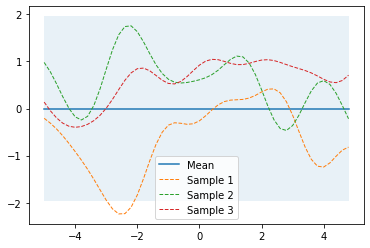

In [45]:
%matplotlib inline

from gaussian_processes_util import plot_gp
# For simplicity, assume those points have zero mean
X=np.arange(-5,5,0.2).reshape(-1,1)

mu=np.zeros(X.shape)
cov=kernel(X,X)

## Inputing cov to plot the confidence band
samples = np.random.multivariate_normal(mu.ravel(), cov, 3) 
plot_gp(mu, cov, X, samples=samples)


#### Define the posterior $\mu_*$ and $\Sigma_*$ through eq $(A)$

In [46]:
from numpy.linalg import inv

def posterior(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    """
    Computes the suffifient statistics of the posterior distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (A)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

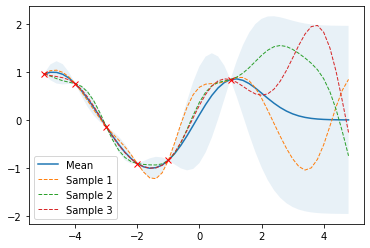

In [48]:
# Noise free training data

X_train = np.array([-5, -4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior distribution
mu_s, cov_s = posterior(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

One can observe that for the part with data, the curve is learned well. However, for the part that is not in range, the confidence band is rather large. 

#### Suppose the training data is not clean, then one will only get approximated sample curves along those data. 

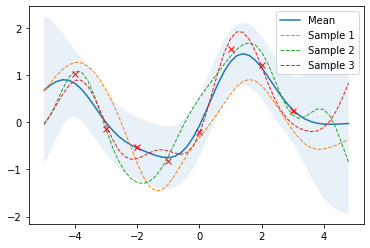

In [49]:
noise = 0.4

# Noisy training data
X_train = np.arange(-4, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)
#noise is added to the training datapoints

# Compute mean and covariance of the posterior distribution
mu_s, cov_s = posterior(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

One can also visualize the effect of changing the different $l$ and $\sigma$: in general, $\sigma$ changes the confidence band quite a lot and $l$ changes the smoothness.

In the plot below, one essentially changes the belief over the level of smoothness and the noise level (in the available data/ data to be predicted)

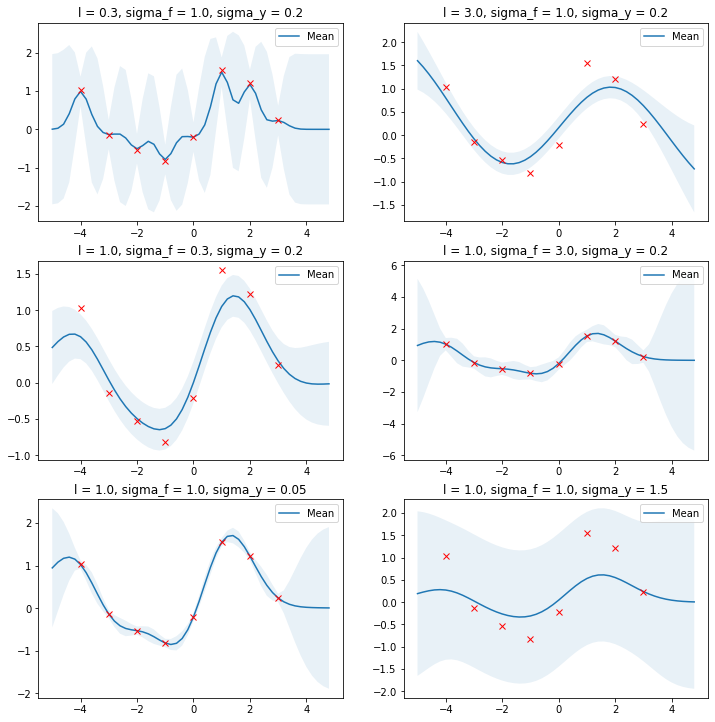

In [50]:
import matplotlib.pyplot as plt

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior(X, X_train, Y_train, l=l, 
                            sigma_f=sigma_f, 
                            sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

It is of course of great interest to know what set of parameters best describe the data characteristics, and it is described by the log mariginal likelihood<sup>[1][3]</sup>:
$$
\log p(\mathbf{y} \lvert \mathbf{X}) = 
\log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{\mu},\mathbf{K}_y) =
-\frac{1}{2} (\mathbf{y}-\boldsymbol{\mu})^T \mathbf{K}_y^{-1} (\mathbf{y}-\boldsymbol{\mu}) 
-\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} 
-\frac{N}{2} \log(2\pi) \tag{11}
$$
This will also give us a way to estimate the level of the noise in the data ($\sigma_y$).

This equation is easy to code, so it will give us the `naive` representation of the log likelihood, in the referece : https://github.com/krasserm/bayesian-machine-learning, a more stable version is also given.

In [51]:
from numpy.linalg import cholesky, det
from scipy.linalg import solve_triangular
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise, naive=True):
    """
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train and given
    noise level.

    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (11), if
               False use a numerically more stable implementation.

    Returns:
        Minimization objective.
    """
    
    Y_train = Y_train.ravel()
    
    def nll_naive(theta):
        # Naive implementation of Eq. (11). Works well for the examples 
        # in this article but is numerically less stable compared to 
        # the implementation in nll_stable below.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)
        
    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (11) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        
        S1 = solve_triangular(L, Y_train, lower=True)
        S2 = solve_triangular(L.T, S1, lower=False)
        
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.dot(S2) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    if naive:
        return nll_naive
    else:
        return nll_stable

In [52]:
# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

In [53]:
# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x

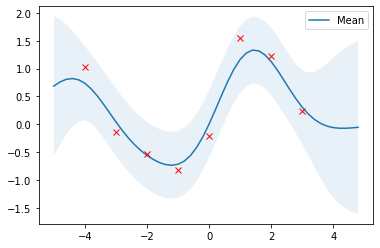

In [54]:
# Compute posterior mean and covariance with optimized kernel parameters and plot the results
mu_s, cov_s = posterior(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

### To be consistent with the reference
We use GPy (a well developed library) to fit the data. It provides a `GPRegression` class for implementing GP regression models. By default, `GPRegression` also estimates the noise parameter $\sigma_y$ from data, so we have to `fix()` this parameter to be able to reproduce the above results.

In [55]:
import GPy

In [56]:
rbf=GPy.kern.RBF(input_dim=1, variance=1.0,lengthscale=1.0)
gpr=GPy.models.GPRegression(X_train,Y_train,rbf)

# The data noise is fixed for learning
gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()

array([0])

In [57]:
# Run optimization
gpr.optimize();

# Display optimized parameter values
display(gpr)

GP_regression.,value,constraints,priors
rbf.variance,0.6839339392137483,+ve,
rbf.lengthscale,1.1309029383513427,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


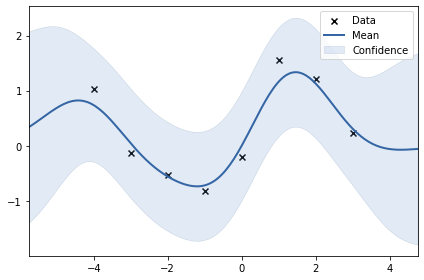

In [58]:
l = gpr.rbf.lengthscale.values[0]
sigma_f = np.sqrt(gpr.rbf.variance.values[0])

# Compare with previous results
assert(np.isclose(l_opt, l))
assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results with the built-in plot function
gpr.plot();

# Application in Finance

### Define the Black-scholes pricing formula

In [342]:
import scipy.stats as st
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

In [343]:
def bsformula(cp, s, k, rf, t, v, div):
        """ Price an option using the Black-Scholes model.
        cp: +1/-1 for call/put
        s: initial stock price
        k: strike price
        t: expiration time
        v: volatility
        rf: risk-free rate
        div: dividend
        """

        d1 = (np.log(s/k)+(rf-div+0.5*v*v)*t)/(v*np.sqrt(t))
        d2 = d1 - v*np.sqrt(t)

        optprice = (cp*s*np.exp(-div*t)*st.norm.cdf(cp*d1)) - (cp*k*np.exp(-rf*t)*st.norm.cdf(cp*d2))
        delta = cp*st.norm.cdf(cp*d1)
        vega  = s*np.sqrt(t)*st.norm.pdf(d1)
        return optprice, delta, vega

In [344]:
K_C = 130; K_P=80    # Call strike ,  Put strike
r = 0.002   # risk-free rate
sigma = 0.3 # implied volatility
T = 2.0     # TTM
S0 = 100    # Spot price

We define a function 

In [345]:
lb = 0.001           # lower bound on domain
ub = 300             # upper bound on domain

training_number = 5  # Number of training samples
testing_number = 50 # Number of testing samples

def call(x,cp=1,K=K_C,r=r,T=T,sigma=sigma,div=0):
    return  bsformula(cp, lb+(ub-lb)*x, K, r, T, sigma, div)[0]

def put(x,cp=-1,K=K_P,r=r,T=T,sigma=sigma,div=0):
    return  bsformula(cp, lb+(ub-lb)*x, K, r, T, sigma, div)[0]

In [346]:
np.random.seed(0)

## Generate the dataset and
train_x_1 = np.array(np.linspace(0, 1, training_number), dtype='float32').reshape(training_number, 1)
train_y_1 = [call(s) for s in train_x_1]

test_x_1 = np.array(np.linspace(0, 1, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_1 = [call(s) for s in test_x_1]

In [347]:
lb+(ub-lb)*train_x_1 ## The train dataset

array([[1.0000000e-03],
       [7.5000748e+01],
       [1.5000050e+02],
       [2.2500024e+02],
       [3.0000000e+02]], dtype=float32)

The kernel from `sklearn.gaussian_process.kernels.RBF` takes the following form: 
$$k(x_i,x_j):= \exp \big(-  \frac{d(x_i,x_j)^2}{2 \sigma^2} \big)$$
The $\sigma$ value is the length scale. One only optimizes the length scale. 

In [348]:
sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0)) 
#If the scale bound is set to fixed, then the length_scale cannot be tuned during the training. 
#One can also use the constant kernel.
gp = GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=9,optimizer='fmin_l_bfgs_b')
gp.fit(train_x_1, train_y_1)

GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=9)

In [349]:
## Also output the confidence band.
y_pred_1, sigma_1 = gp.predict(test_x_1, return_std=True)

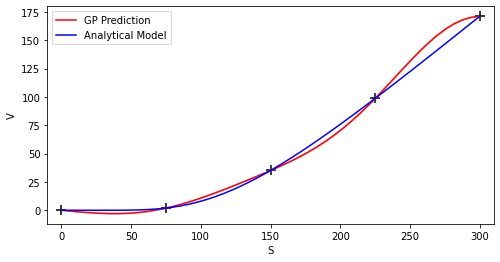

In [350]:
#The confidence band is small in this case

plt.figure(figsize = (8, 4), facecolor='white', edgecolor='blue')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_1, color = 'red', label = 'GP Prediction')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'blue', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_1, train_y_1, color = 'black', marker = '+', s = 100) 
plt.fill_between(lb+(ub-lb)*test_x_1.flatten(), (y_pred_1.T-2*sigma_1).flatten(), (y_pred_1.T+2*sigma_1).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlim([lb-10, ub+10])
plt.xlabel('S')
plt.ylabel('V');

### We can also consider a simple portfolio of call and put options

In [351]:
train_x_2 = np.array(np.linspace(0,1, training_number), dtype='float32').reshape(training_number, 1)
train_y_2 = [put(S) for S in train_x_2]
    
test_x_2 = np.array(np.linspace(0,1, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_2 = [put(S) for S in test_x_2]

In [352]:
## Repeating the same code as above
sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0)) 
gp = GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_2, train_y_2)

GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=20)

In [353]:
y_pred_2, sigma_2 = gp.predict(test_x_2, return_std=True)

In [354]:
# The Gaussian process' predictions
y_pred = 5 * y_pred_1 - 2*y_pred_2
# Black-Scholes prices
test_y = 5 * np.array(test_y_1) - 2*np.array(test_y_2)

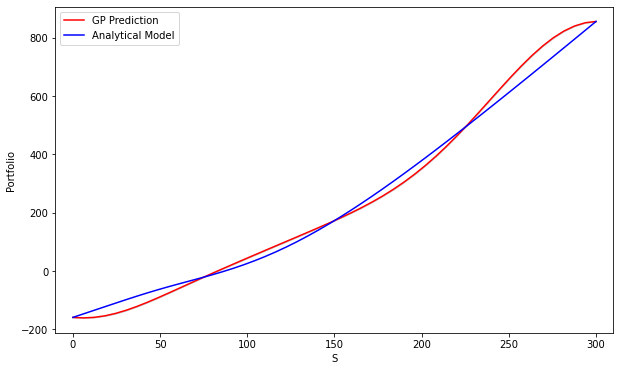

In [355]:
sigma = np.sqrt(sigma_1*sigma_1 + sigma_2*sigma_2)

plt.figure(figsize = (10, 6), facecolor='white', edgecolor='blue')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), y_pred, color = 'red', label = 'GP Prediction')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), test_y.flatten(), color = 'blue', label = 'Analytical Model')
plt.fill_between(lb+(ub-lb)*test_x_2.flatten(), (y_pred.T-2*sigma).flatten(), (y_pred.T+2*sigma).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlim([lb-10, ub+10])
plt.xlabel('S')
plt.ylabel('Portfolio ');

As one can observe, due to the sparsity of the training dataset, the learned portolio is not very accurate. Also, since in this case, there is no noise added, the points learned are accurate. 

### The noisy call option price

The following results suggest that the scale could be an issue

In [391]:
rng = np.random.RandomState(1)

In [392]:
noise_std = 2.0
train_y_1=np.array(train_y_1)
y_train_noisy = train_y_1+ rng.normal(loc=0.0, scale=noise_std, size=train_y_1.shape)

In [393]:
y_train_noisy=y_train_noisy.ravel()

In [394]:
y_train_noisy

array([  3.24869073,   0.70303093,  34.05252118,  96.6026914 ,
       172.9846732 ])

In [395]:
gaussian_process = GaussianProcessRegressor(
    kernel=sk_kernel, alpha=noise_std**2, n_restarts_optimizer=20
)

gaussian_process.fit(train_x_1, y_train_noisy)
#

 C:\Users\huisu\anaconda3\envs\gputest2\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning:lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


GaussianProcessRegressor(alpha=4.0, kernel=RBF(length_scale=1),
                         n_restarts_optimizer=20)

In [396]:
mean_prediction, std_prediction = gaussian_process.predict(test_x_1, return_std=True)

In [397]:
mean_prediction

array([ 5.33862783,  5.9366667 ,  6.5723892 ,  7.24614633,  7.95810938,
        8.70825806,  9.49636708, 10.32199719, 11.18448284, 12.08292723,
       13.01619122, 13.98288959, 14.98138943, 16.00980409, 17.06599592,
       18.14757776, 19.25191553, 20.3761427 , 21.51715137, 22.67162566,
       23.8360372 , 25.00666852, 26.17962734, 27.35087448, 28.51622698,
       29.67140645, 30.81203743, 31.93369702, 33.0319323 , 34.10228286,
       35.14031689, 36.14166683, 37.10205037, 38.01730613, 38.88341547,
       39.6965375 , 40.45304154, 41.14952851, 41.78285113, 42.35014955,
       42.8488662 , 43.27676283, 43.63194138, 43.91285972, 44.11833965,
       44.24757705, 44.3001463 , 44.2760047 , 44.17549109, 43.99932191])

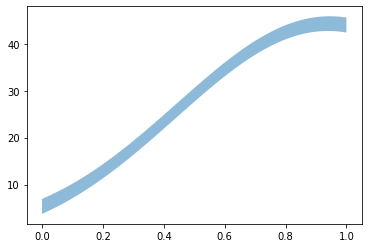

In [398]:
#plt.plot(train_x_1, train_y_1, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.fill_between(
    test_x_1.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)

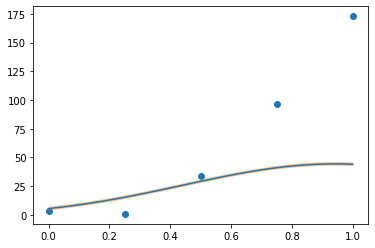

In [399]:
plt.scatter(train_x_1, y_train_noisy, label="Observations")
plt.plot(test_x_1, mean_prediction, label="Mean prediction")
plt.fill_between(
    test_x_1.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)

## References

\[1\] Kevin P. Murphy. [Machine Learning, A Probabilistic Perspective](https://mitpress.mit.edu/books/machine-learning-0), Chapters 4, 14 and 15.  

\[2\] Christopher M. Bishop. [Pattern Recognition and Machine Learning](http://www.springer.com/de/book/9780387310732), Chapter 6.  

\[3\] Carl Edward Rasmussen and Christopher K. I. Williams. [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/). 

\[4\] Matthew F. Dixon, Igor Halperin and Paul Bilkon. [Machine Learning in Finance. From theory to practice](https://link.springer.com/book/10.1007/978-3-030-41068-1) Chapter 4.